In [6]:
import numpy as np
import pandas as pd

In [7]:
# Python DeCal - Homework 7: Pandas + Plotting - Mackaelan Songco 

In [8]:
# 1 Analyzing Air Quality Data

In [9]:
# 1.1 Load the Data
dataFrame = pd.read_csv("global_air_quality.csv")
dataFrame

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00


In [10]:
# 1.2 Make a New Column
FrameValueNumeric = np.array(dataFrame.loc[:, 'FactValueNumeric'])
dataFrame.insert(34, 'PM25_Value', FrameValueNumeric, True)
dataFrame.loc[:, ['FactValueNumeric', 'PM25_Value']]

,FactValueNumeric,PM25_Value
0,10.01,10.01
1,10.02,10.02
2,10.06,10.06
3,10.08,10.08
4,10.09,10.09
...,...,...
9445,9.92,9.92
9446,9.92,9.92
9447,9.94,9.94
9448,9.95,9.95


In [27]:
# 1.3 Calculate Average PM2.5 Concentration
data = dataFrame.loc[:, ['Location', 'ParentLocation', 'PM25_Value']]
conditions = [
    (data['ParentLocation'] == 'Africa'),
    (data['ParentLocation'] == 'Americas'),
    (data['ParentLocation'] == 'Eastern Mediterranean'),
    (data['ParentLocation'] == 'Europe'),
    (data['ParentLocation'] == 'South-East Asia'),
    (data['ParentLocation'] == 'Western Pacific')
]
choices = [29.812282, 14.645728, 38.403682, 19.244727, 32.145796, 15.497559]
data['Average_PM25'] = np.select(conditions, choices, default='Unknown')
data

,Location,ParentLocation,PM25_Value,Average_PM25
0,Kenya,Africa,10.01,29.812282
1,Trinidad and Tobago,Americas,10.02,14.645728
2,United Kingdom of Great Britain and Northern I...,Europe,10.06,19.244727
3,Grenada,Americas,10.08,14.645728
4,Brazil,Americas,10.09,14.645728
...,...,...,...,...
9445,Belize,Americas,9.92,14.645728
9446,Trinidad and Tobago,Americas,9.92,14.645728
9447,Kenya,Africa,9.94,29.812282
9448,United States of America,Americas,9.95,14.645728


In [ ]:
# 1.4 Analyze Data
# The Eastern Mediterranean ahs the highest average air pollution and this surprised me mainly because I wasn't really aware of which location was the mos t polluted. 

In [13]:
# 1.5 Save the Processed Data
cvsDataFrame = pd.DataFrame(data)
cvsDataFrame.to_csv('updated_global_air_quality.csv', index=False)

In [ ]:
# 2 Planets, planets, planets!

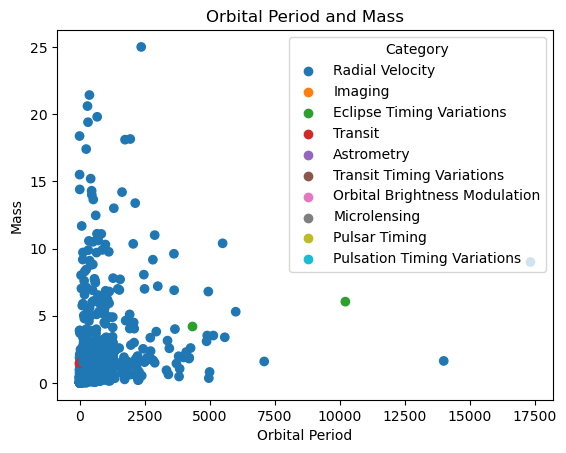

In [28]:
# 2.1 Create a Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

dataFramePlanets = sns.load_dataset('planets')
xAxis = np.array(dataFramePlanets.loc[:, 'orbital_period'])
yAxis = np.array(dataFramePlanets.loc[:, 'mass'])
methods = dataFramePlanets['method'].unique()
color = {category: color for category, color in zip(methods, plt.cm.tab10.colors)}
dataFramePlanets['color'] = dataFramePlanets['method'].map(color)

plt.figure()
plt.scatter(xAxis, yAxis, c=dataFramePlanets['color'])
for method in methods:
    plt.scatter([], [], color=color[method], label=method)
plt.title("Orbital Period and Mass")
plt.xlabel("Orbital Period")
plt.ylabel("Mass")
plt.legend(title="Category", loc="upper right")
plt.show()

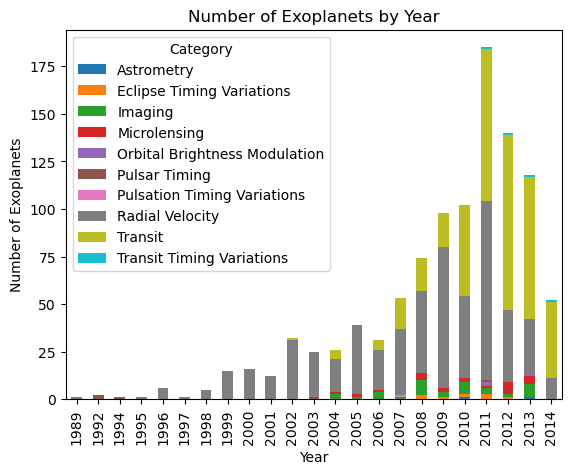

In [45]:
# 2.2 Create a Bar Chart
methods = planets.groupby(['year', 'method']).size().reset_index(name='count')
barDataFrame = methods.pivot_table(index='year', columns='method', values='count', aggfunc='sum').fillna(0)
barDataFrame.plot(kind='bar', stacked=True)
plt.title('Number of Exoplanets by Year')
plt.xlabel('Year')
plt.ylabel('Number of Exoplanets')
plt.legend(title="Category", loc="upper left")
plt.show()